In [42]:
import pandas as pd
from mplsoccer import Pitch,Sbopen

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [43]:
parser= Sbopen()

In [44]:
df, related, freeze, tactics = parser.event(3895250)

In [45]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'out', 'off_camera', 'pass_switch',
       'counterpress', 'shot_statsbomb_xg', 'end_z', 'shot_first_time',
       'technique_id', 'technique_name', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'pass_cross', 'pass_deflected',
       'ball_recovery_recovery_failure', 'block_offensive', 'aerial_won',
       'pass_cut_back', 'pass_assisted_shot_id', 'pass_go

In [46]:
df = df[df['team_name']=='Bayer Leverkusen']

In [47]:
df['outcome_name'].unique()

array([nan, 'Incomplete', 'Goal', 'Claim', 'No Touch', 'Success',
       'Success To Team', 'Won', 'Complete', 'Saved Twice', 'Saved',
       'Wayward', 'Lost', 'Success In Play', 'Pass Offside', 'Blocked',
       'Out', 'Lost In Play', 'Off T', 'Saved Off Target', 'Unknown',
       'Lost Out', 'Tactical'], dtype=object)

In [48]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Miscontrol', 'Pressure', 'Block', 'Ball Recovery', 'Foul Won',
       'Shot', 'Goal Keeper', 'Clearance', 'Dispossessed',
       'Foul Committed', 'Duel', '50/50', 'Interception', 'Dribble',
       'Dribbled Past', 'Injury Stoppage', 'Referee Ball-Drop', 'Shield',
       'Bad Behaviour', 'Half End', 'Tactical Shift', 'Error',
       'Substitution'], dtype=object)

In [49]:
df['player_id'].unique()

array([   nan,  8804., 27133., 30606., 10336.,  8221., 32712.,  3500.,
       40724.,  9195.,  8667., 33401.,  7044., 41411., 38004., 28239.])

In [50]:
passes = df[df['type_name']=='Pass']
filtered = passes[['player_name','x','y','end_x', 'end_y','pass_recipient_name','outcome_id','outcome_name']]

In [51]:
filtered[filtered['outcome_name'].isnull()]

,player_name,x,y,end_x,end_y,pass_recipient_name,outcome_id,outcome_name
4,Jonas Hofmann,61.0,40.1,39.7,48.5,Odilon Kossonou,NaN,NaN
7,Odilon Kossonou,41.3,47.5,46.3,16.3,Edmond Fayçal Tapsoba,NaN,NaN
11,Edmond Fayçal Tapsoba,48.0,17.0,57.0,5.0,Alejandro Grimaldo García,NaN,NaN
14,Alejandro Grimaldo García,56.0,5.2,38.5,3.8,Edmond Fayçal Tapsoba,NaN,NaN
17,Edmond Fayçal Tapsoba,25.7,22.7,25.9,38.8,Jonathan Tah,NaN,NaN
...,...,...,...,...,...,...,...,...
3741,Granit Xhaka,80.2,7.7,84.4,0.9,Piero Martín Hincapié Reyna,NaN,NaN
3744,Piero Martín Hincapié Reyna,77.7,1.2,56.1,1.8,Edmond Fayçal Tapsoba,NaN,NaN
3747,Edmond Fayçal Tapsoba,56.1,1.8,73.1,1.4,Piero Martín Hincapié Reyna,NaN,NaN
3766,Jonathan Tah,48.3,29.5,62.7,33.4,Patrik Schick,NaN,NaN


In [52]:
df_lineup = parser.lineup(3895250)
jersey_data=df_lineup[['player_id','jersey_number']]

In [53]:
df= pd.merge(df,jersey_data,on='player_id')


In [54]:
#player id is the jersey number
df['passer'] = df['jersey_number']
passes = df[df['type_name']=='Pass']
successful = passes[passes['outcome_name'].isnull()]

In [55]:
rec= pd.to_numeric(successful['pass_recipient_id'],downcast='integer')
jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)
successful=pd.merge(df,jersey_data,on='pass_recipient_id')
successful

C:\Users\oussama\AppData\Local\Temp\ipykernel_10116\1439914159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
C:\Users\oussama\AppData\Local\Temp\ipykernel_10116\1439914159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,block_save_block,substitution_replacement_id,substitution_replacement_name,dribble_overrun,jersey_number,passer,pass_recipient
0,2c8959ba-eede-48db-a7c3-c06853b94042,5,1,00:00:01.186000,0,1,2,1.219663,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
1,79925e3b-8d47-4f73-aa82-1cb6cf1dd86b,1849,1,00:47:03.140000,47,3,86,1.300945,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
2,3202c957-e311-45ac-bbfe-2115e3946018,2046,2,00:03:32.651000,48,32,98,1.075243,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
3,bda4480a-996c-4314-9329-d3c4d38f19fa,66,1,00:01:21.332000,1,21,5,2.705411,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,6
4,09b15207-b186-46e7-a0a4-5b4a6fb65f7b,132,1,00:04:50.931000,4,50,10,1.208637,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,34c5c44c-5055-4cc2-b399-19faa68dda47,3376,2,00:40:12.111000,85,12,162,2.047792,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,34,19
699,761a476c-b2db-4ce0-9d69-e569a84ed10b,3231,2,00:37:48.943000,82,48,156,0.981946,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,19
700,041952e6-4f4e-41d4-91ea-5a0847b2303e,3531,2,00:42:48.336000,87,48,166,0.791556,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,19
701,72b414c0-a776-48fa-bab5-2c0483a431ac,3553,2,00:43:01.605000,88,1,168,1.394741,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,19


In [56]:
subs = df[df['type_name']=='Substitution']
subs = subs['minute']
firstSub=subs.min()

In [57]:
firstSub

55

In [58]:
successful = successful[successful['minute']<firstSub]

In [59]:
successful

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,block_save_block,substitution_replacement_id,substitution_replacement_name,dribble_overrun,jersey_number,passer,pass_recipient
0,2c8959ba-eede-48db-a7c3-c06853b94042,5,1,00:00:01.186000,0,1,2,1.219663,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
1,79925e3b-8d47-4f73-aa82-1cb6cf1dd86b,1849,1,00:47:03.140000,47,3,86,1.300945,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
2,3202c957-e311-45ac-bbfe-2115e3946018,2046,2,00:03:32.651000,48,32,98,1.075243,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
3,bda4480a-996c-4314-9329-d3c4d38f19fa,66,1,00:01:21.332000,1,21,5,2.705411,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,6
4,09b15207-b186-46e7-a0a4-5b4a6fb65f7b,132,1,00:04:50.931000,4,50,10,1.208637,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,1c049abd-8bbf-41f9-b835-f3d4b05a67c5,953,1,00:22:42.670000,22,42,39,0.965561,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,1
657,131196b1-f3ef-4013-98ea-7fe7a377a74a,908,1,00:21:18.631000,21,18,37,3.803408,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,34,1
659,20ed8552-1113-4e45-86c0-dbe6868987c0,325,1,00:09:49.165000,9,49,22,1.266405,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,1
660,7f27c0d1-f150-4fad-a977-57678a1f8a0c,386,1,00:11:15.296000,11,15,23,3.120306,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,1


In [60]:
successful.dtypes


id                               object
index                             int64
period                            int64
timestamp                        object
minute                            int64
                                  ...  
substitution_replacement_name    object
dribble_overrun                  object
jersey_number                     int64
passer                            int64
pass_recipient                    int64
Length: 73, dtype: object

In [61]:
successful

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,block_save_block,substitution_replacement_id,substitution_replacement_name,dribble_overrun,jersey_number,passer,pass_recipient
0,2c8959ba-eede-48db-a7c3-c06853b94042,5,1,00:00:01.186000,0,1,2,1.219663,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
1,79925e3b-8d47-4f73-aa82-1cb6cf1dd86b,1849,1,00:47:03.140000,47,3,86,1.300945,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
2,3202c957-e311-45ac-bbfe-2115e3946018,2046,2,00:03:32.651000,48,32,98,1.075243,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,6
3,bda4480a-996c-4314-9329-d3c4d38f19fa,66,1,00:01:21.332000,1,21,5,2.705411,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,6
4,09b15207-b186-46e7-a0a4-5b4a6fb65f7b,132,1,00:04:50.931000,4,50,10,1.208637,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,1c049abd-8bbf-41f9-b835-f3d4b05a67c5,953,1,00:22:42.670000,22,42,39,0.965561,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,1
657,131196b1-f3ef-4013-98ea-7fe7a377a74a,908,1,00:21:18.631000,21,18,37,3.803408,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,34,1
659,20ed8552-1113-4e45-86c0-dbe6868987c0,325,1,00:09:49.165000,9,49,22,1.266405,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,1
660,7f27c0d1-f150-4fad-a977-57678a1f8a0c,386,1,00:11:15.296000,11,15,23,3.120306,3895250,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,1


In [62]:
df['pass_recipient_id'].unique()

array([27133.,    nan, 32712.,  3500., 33401.,  8221., 40724., 10336.,
        9195., 30606.,  8804.,  8667.,  7044., 38004., 28239., 41411.])

In [63]:
average_locations= successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [64]:
average_locations

,x,y,count
passer,,,
1,9.276923,41.876923,13
4,54.373684,43.771053,38
6,50.507143,65.785714,42
7,80.969697,51.357576,33
8,61.087037,38.574074,54
10,80.048837,29.546512,43
12,51.960000,21.956364,55
20,74.615385,13.876923,39
21,65.487500,37.687500,16


In [65]:
pass_between = successful.groupby(['passer','pass_recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)
pass_between

,passer,pass_recipient,pass_count
0,1,4,1
1,1,6,2
2,1,7,3
3,1,12,1
4,1,21,3
...,...,...,...
86,34,10,10
87,34,12,8
88,34,20,10
89,34,21,4


In [66]:
pass_between= pass_between.merge(average_locations,left_on='passer',right_index=True)
pass_between


,passer,pass_recipient,pass_count,x,y,count
0,1,4,1,9.276923,41.876923,13
1,1,6,2,9.276923,41.876923,13
2,1,7,3,9.276923,41.876923,13
3,1,12,1,9.276923,41.876923,13
4,1,21,3,9.276923,41.876923,13
...,...,...,...,...,...,...
86,34,10,10,61.625862,39.325862,58
87,34,12,8,61.625862,39.325862,58
88,34,20,10,61.625862,39.325862,58
89,34,21,4,61.625862,39.325862,58


In [67]:
pass_between= pass_between.merge(average_locations,left_on='pass_recipient',right_index=True,suffixes=['','_end'])
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,4,1,9.276923,41.876923,13,54.373684,43.771053,38
15,6,4,7,50.507143,65.785714,42,54.373684,43.771053,38
24,7,4,3,80.969697,51.357576,33,54.373684,43.771053,38
34,8,4,5,61.087037,38.574074,54,54.373684,43.771053,38
43,10,4,3,80.048837,29.546512,43,54.373684,43.771053,38
...,...,...,...,...,...,...,...,...,...
90,34,30,6,61.625862,39.325862,58,73.496667,65.436667,30
14,6,1,1,50.507143,65.785714,42,9.276923,41.876923,13
33,8,1,3,61.087037,38.574074,54,9.276923,41.876923,13
52,12,1,1,51.960000,21.956364,55,9.276923,41.876923,13


In [68]:
pass_between =pass_between[pass_between['pass_count']>3]
pass_between.drop_duplicates()
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
15,6,4,7,50.507143,65.785714,42,54.373684,43.771053,38
34,8,4,5,61.087037,38.574074,54,54.373684,43.771053,38
53,12,4,5,51.960000,21.956364,55,54.373684,43.771053,38
82,34,4,6,61.625862,39.325862,58,54.373684,43.771053,38
6,4,6,6,54.373684,43.771053,38,50.507143,65.785714,42
35,8,6,6,61.087037,38.574074,54,50.507143,65.785714,42
75,30,6,8,73.496667,65.436667,30,50.507143,65.785714,42
83,34,6,5,61.625862,39.325862,58,50.507143,65.785714,42
16,6,7,7,50.507143,65.785714,42,80.969697,51.357576,33
63,20,7,4,74.615385,13.876923,39,80.969697,51.357576,33


In [69]:
average_locations['count'].values
pass_between['pass_count'].values

array([ 7,  5,  5,  6,  6,  6,  8,  5,  7,  4,  7, 11, 12, 10,  8,  5,  8,
        5,  4,  8,  6, 10, 12,  5,  6,  6,  5,  4,  5, 10,  7,  4,  7,  7,
        4,  9, 12,  6, 10, 11,  8, 10, 10,  6,  9,  6], dtype=int64)

In [70]:
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
15,6,4,7,50.507143,65.785714,42,54.373684,43.771053,38
34,8,4,5,61.087037,38.574074,54,54.373684,43.771053,38
53,12,4,5,51.960000,21.956364,55,54.373684,43.771053,38
82,34,4,6,61.625862,39.325862,58,54.373684,43.771053,38
6,4,6,6,54.373684,43.771053,38,50.507143,65.785714,42
35,8,6,6,61.087037,38.574074,54,50.507143,65.785714,42
75,30,6,8,73.496667,65.436667,30,50.507143,65.785714,42
83,34,6,5,61.625862,39.325862,58,50.507143,65.785714,42
16,6,7,7,50.507143,65.785714,42,80.969697,51.357576,33
63,20,7,4,74.615385,13.876923,39,80.969697,51.357576,33


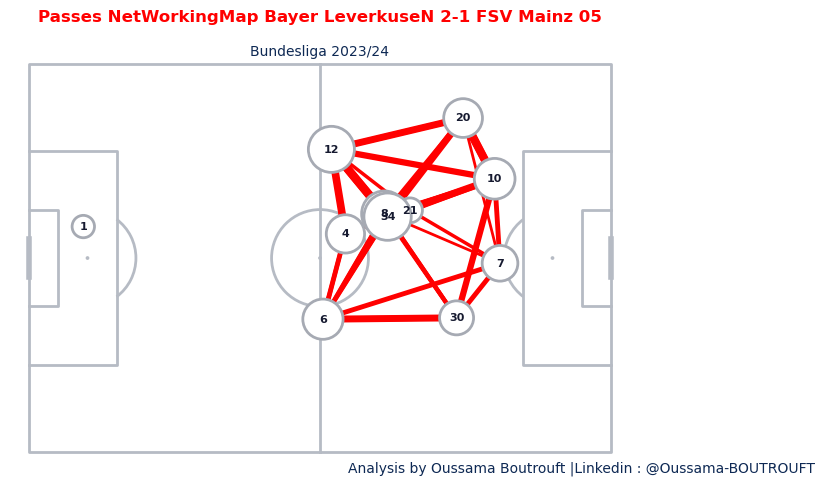

In [71]:
pitch = Pitch(pitch_color='#FFFFFF', line_color='#B6BBC4')
# Set the figure size
fig, ax = pitch.draw(figsize=(8, 6), constrained_layout=True, tight_layout=False)

# Set the face color of the figure
fig.set_facecolor('#FFFFFF')

# Draw arrows and nodes
# arrows = pitch.arrows(1.2 * pass_between.x, 0.8 * pass_between.y, 1.2 * pass_between.x_end, 0.8 * pass_between.y_end, ax=ax,color='red', alpha=0.4,width=3)
pass_lines = pitch.lines(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, lw=pass_between.pass_count*0.5,color='red', zorder=1, ax=ax)
                 
nodes = pitch.scatter(1.2 * average_locations.x, 0.8 * average_locations.y, s=20*average_locations['count'].values, color='white', edgecolors='#a6aab3', linewidth=2, alpha=1, zorder=1, ax=ax)

                 
# Annotate average_locations
for index, row in average_locations.iterrows():
    pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='#161A30',fontweight='bold', va='center', ha='center', size=8, ax=ax)

# Add the endnote
ax.text(114, 85, 'Analysis by Oussama Boutrouft |Linkedin : @Oussama-BOUTROUFT', color='#0E2954', va='bottom', ha='center', fontsize=10)

# Add the title
ax.set_title('Passes NetWorkingMap Bayer LeverkuseN 2-1 FSV Mainz 05', color='red', va='center', ha='center', fontsize=12,fontweight='bold',pad=20,loc='center')
ax.annotate('Bundesliga 2023/24', xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='#0E2954', va='top', ha='center')


plt.show()


In [72]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3895250)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

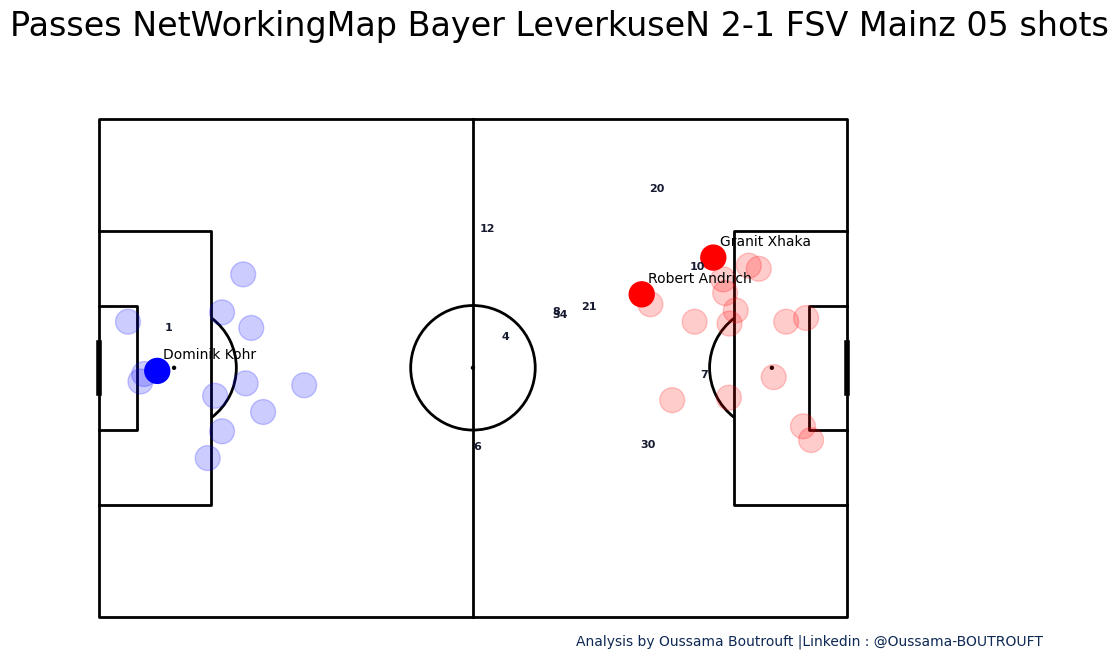

In [73]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Passes NetWorkingMap Bayer LeverkuseN 2-1 FSV Mainz 05 shots", fontsize = 24)
fig.set_size_inches(10, 7)
# Annotate average_locations
for index, row in average_locations.iterrows():
    pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='#161A30',fontweight='bold', va='center', ha='center', size=8, ax=ax)

# Add the endnote
ax.text(114, 85, 'Analysis by Oussama Boutrouft |Linkedin : @Oussama-BOUTROUFT', color='#0E2954', va='bottom', ha='center', fontsize=10)

plt.show()

In [74]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3895250)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

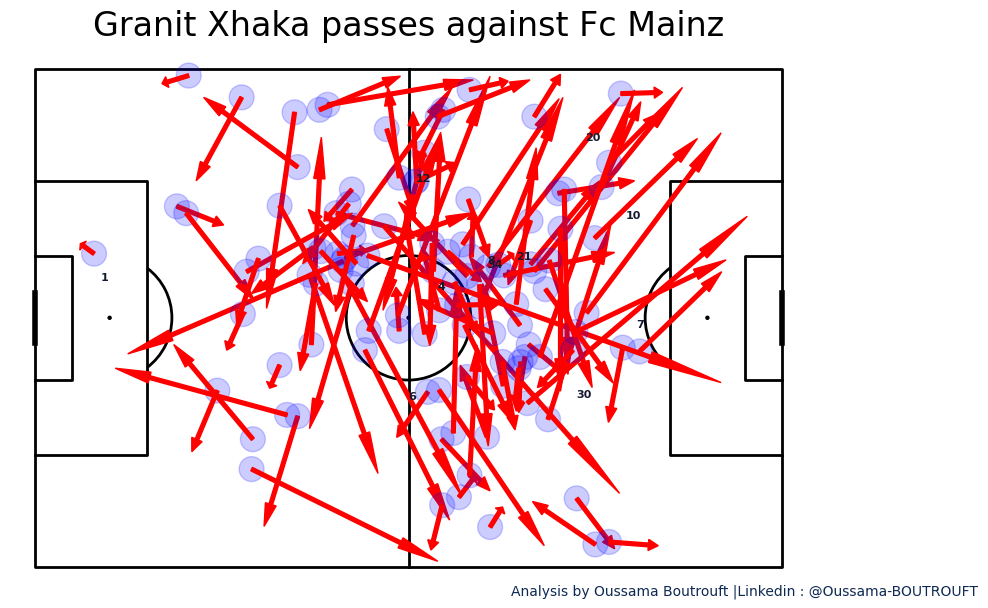

In [77]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Granit Xhaka':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="red")
        ax.add_patch(passArrow)

ax.set_title("Granit Xhaka passes against Fc Mainz", fontsize = 24)
fig.set_size_inches(10, 7)
# Annotate average_locations
for index, row in average_locations.iterrows():
    pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='#161A30',fontweight='bold', va='center', ha='center', size=8, ax=ax)

# Add the endnote
ax.text(114, 85, 'Analysis by Oussama Boutrouft |Linkedin : @Oussama-BOUTROUFT', color='#0E2954', va='bottom', ha='center', fontsize=10)

plt.show()

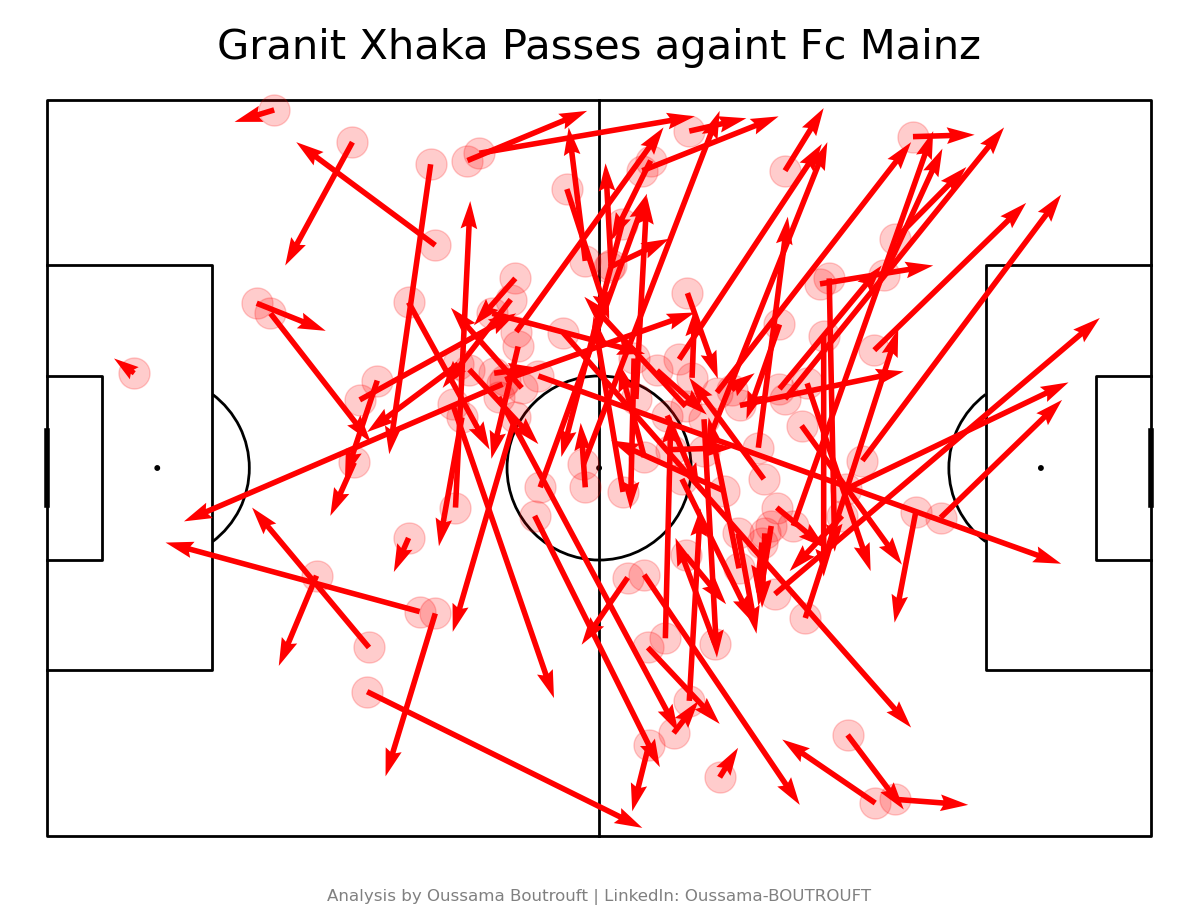

In [78]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Granit Xhaka")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "red", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])
fig.suptitle("Granit Xhaka Passes againt Fc Mainz", fontsize = 30)
fig.text(0.5, 0.01, 'Analysis by Oussama Boutrouft | LinkedIn: Oussama-BOUTROUFT', ha='center', fontsize=12, color='grey')

plt.show()

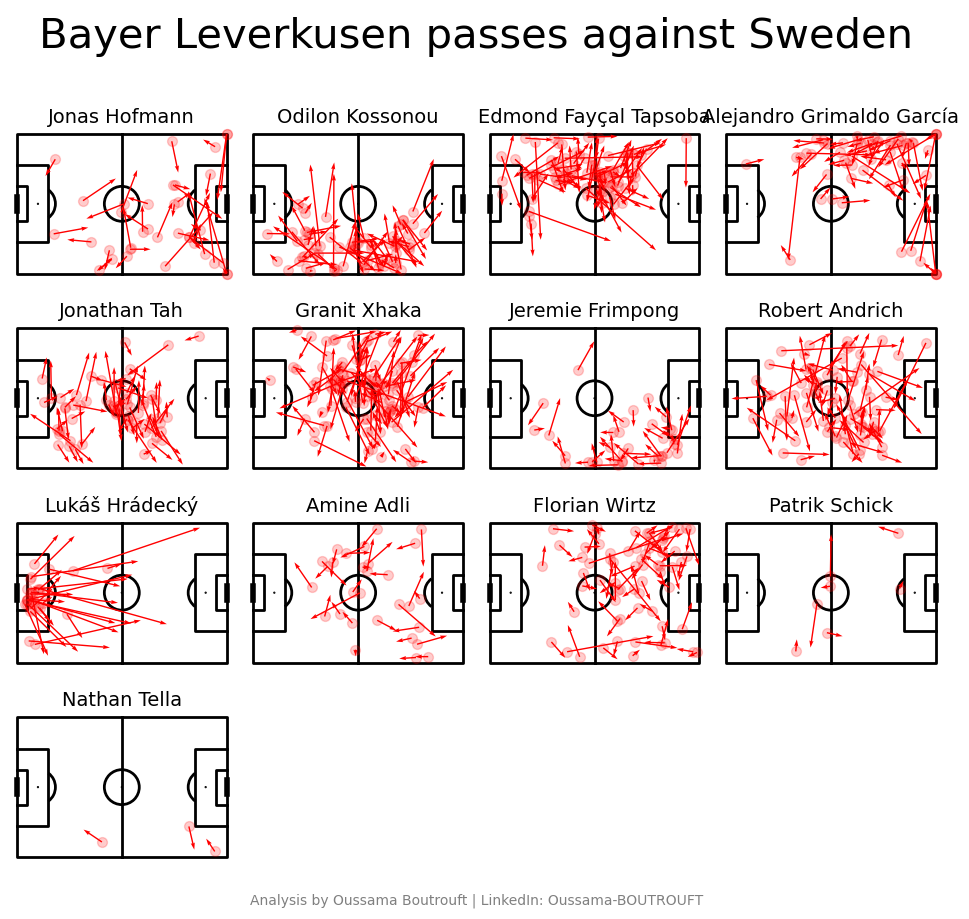

In [81]:
# Prepare the dataframe of passes by Bayer Leverkusen that were not throw-ins
mask_england = (df.type_name == 'Pass') & (df.team_name == "Bayer Leverkusen") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', 'player_name']]
# Get the list of all players who made a pass
names = df_passes['player_name'].unique()

# Draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols=4, nrows=4, grid_height=0.85, title_height=0.06, axis=False,
                      endnote_height=0.04, title_space=0.04, endnote_space=0.01)

# For each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    # Put player name over the plot
    ax.text(60, -10, name, ha='center', va='center', fontsize=14)
    # Take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    # Scatter
    pitch.scatter(player_df.x, player_df.y, alpha=0.2, s=50, color="red", ax=ax)
    # Plot arrow
    pitch.arrows(player_df.x, player_df.y,
                 player_df.end_x, player_df.end_y, color="red", ax=ax, width=1)

# We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

# Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'Bayer Leverkusen passes against Sweden', ha='center', va='center', fontsize=30)
# Add the endnote
fig.text(0.5, 0.01, 'Analysis by Oussama Boutrouft | LinkedIn: Oussama-BOUTROUFT', ha='center', va='center', fontsize=10, color='grey')

plt.show()